### MNE is a library that deals with the analysis of eeg/emg data

In [22]:
import mne
import numpy as np
import matplotlib.pyplot as plt

COMMON EXAMPLE TO BEGIN WITH

In [23]:
file_name = 'oddball_example_small-fif.gz'

io : input/output , module for reading raw data

In [24]:
# mne.io?
raw = mne.io.read_raw_fif(file_name, preload=True)

Opening raw data file oddball_example_small-fif.gz...


C:\Users\realv\AppData\Local\Temp\ipykernel_12476\2932685998.py:2: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_name, preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


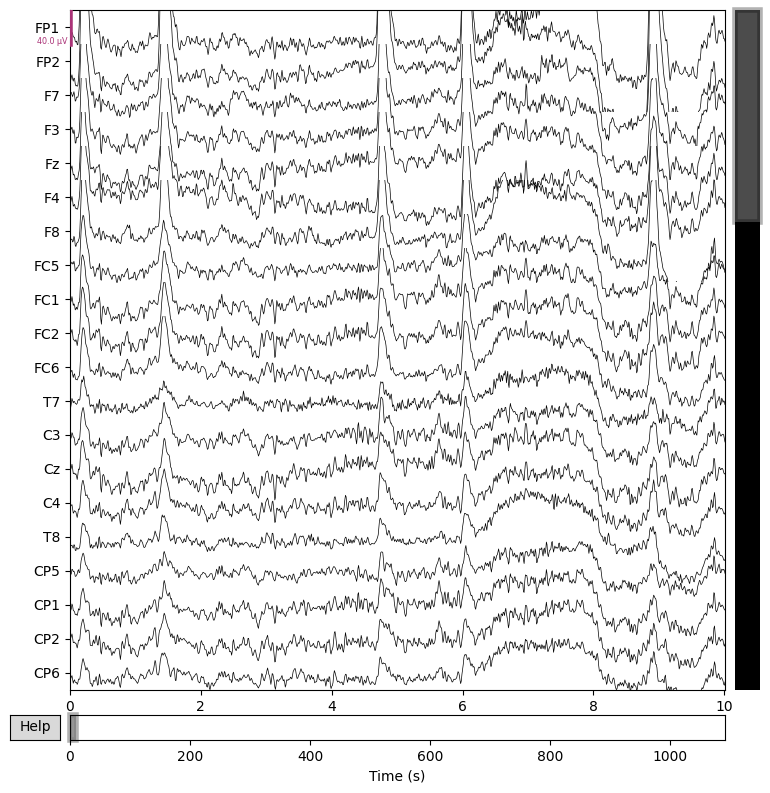

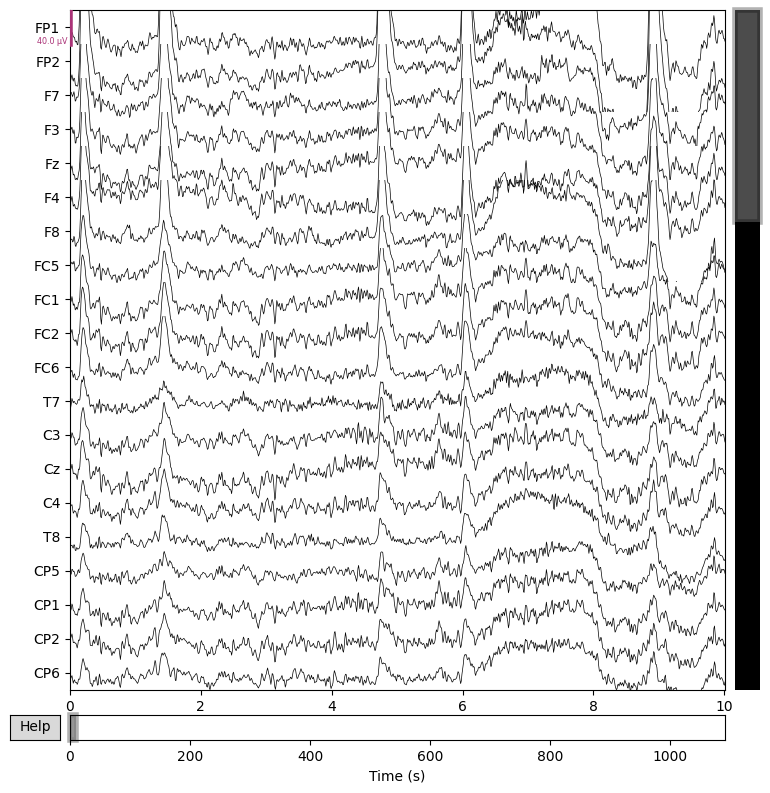

In [25]:
# raw.plot?
raw.plot()

In [26]:
# raw.filter?
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

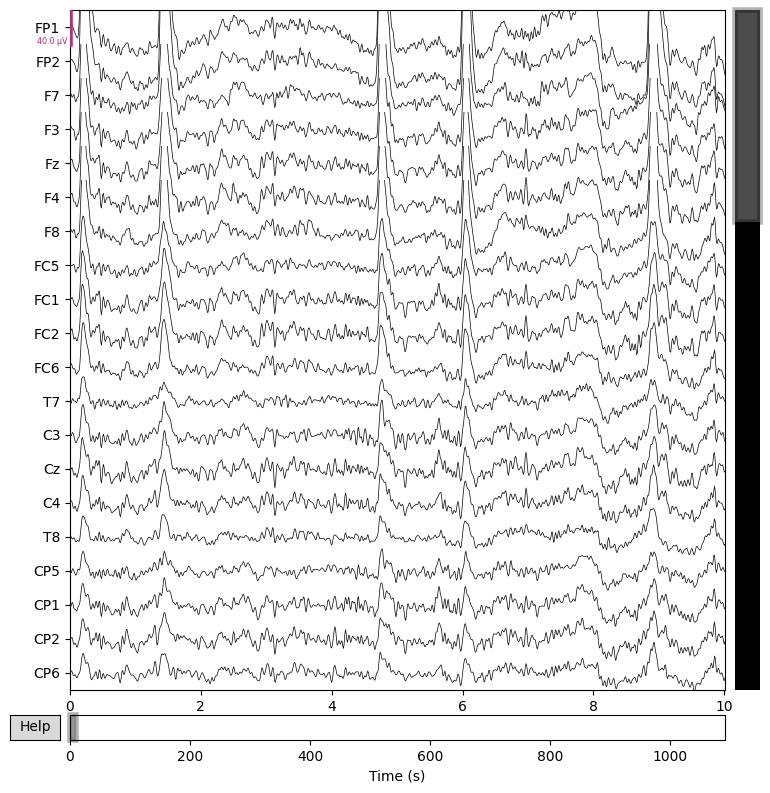

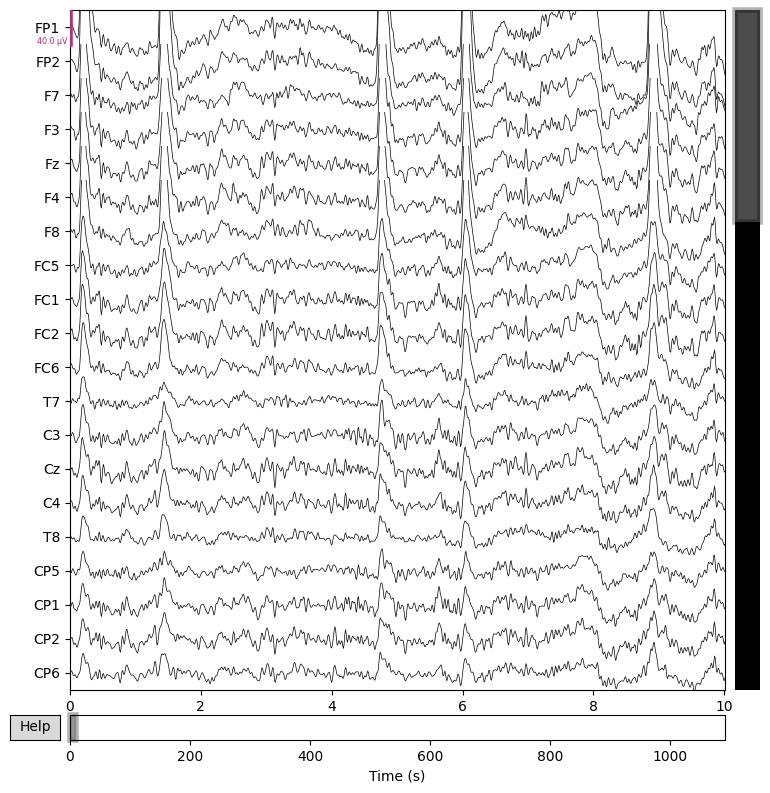

In [27]:
raw.plot()

##### **ICA** - Independent Component Analysis 
EEG consists of different signals mixed together, it must also contain the artifacts for eg. eye blinks, muscle contractions, eye movements etc.
It is the job of ICA to break the signal into different components and which could then be used for artifact repair.

In [28]:
# mne.preprocessing.ICA?
ica = mne.preprocessing.ICA(n_components=20,random_state=0)

In [29]:
#ica.fit?
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.6s.


<ICA | raw data decomposition, method: fastica (fit in 72 iterations on 109098 samples), 20 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

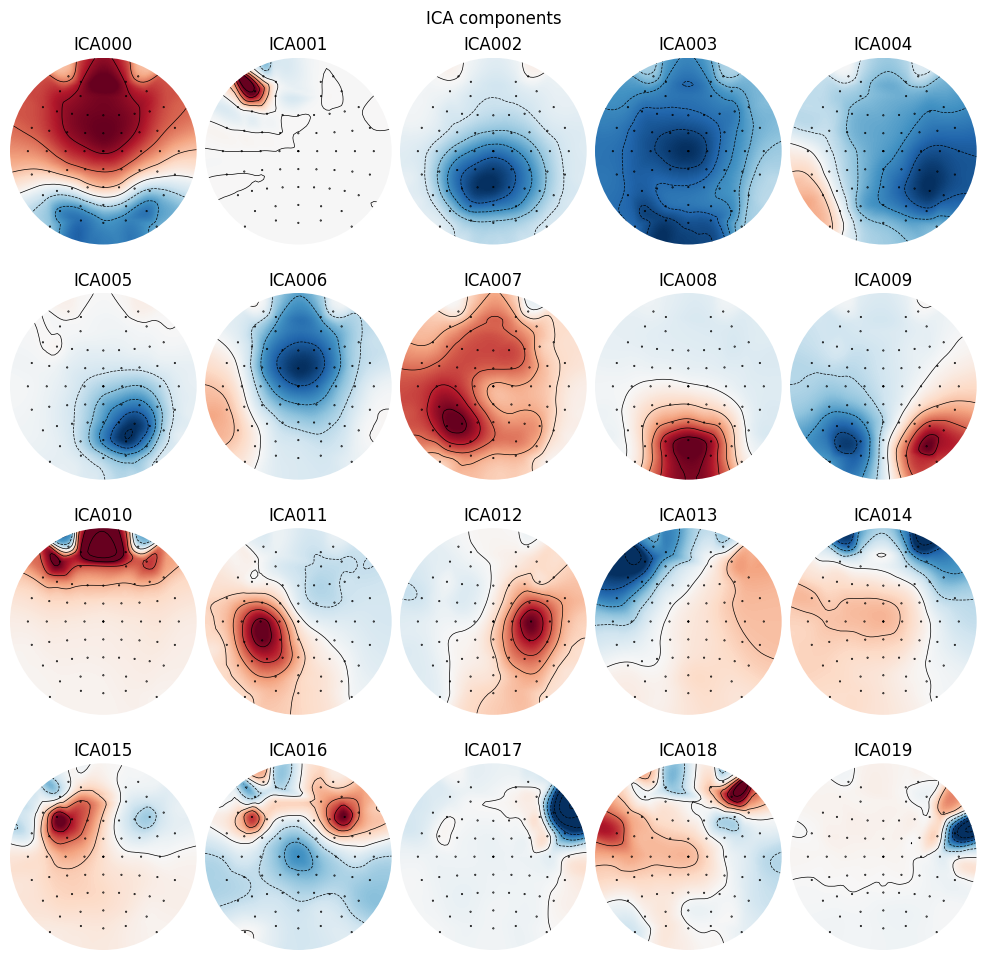

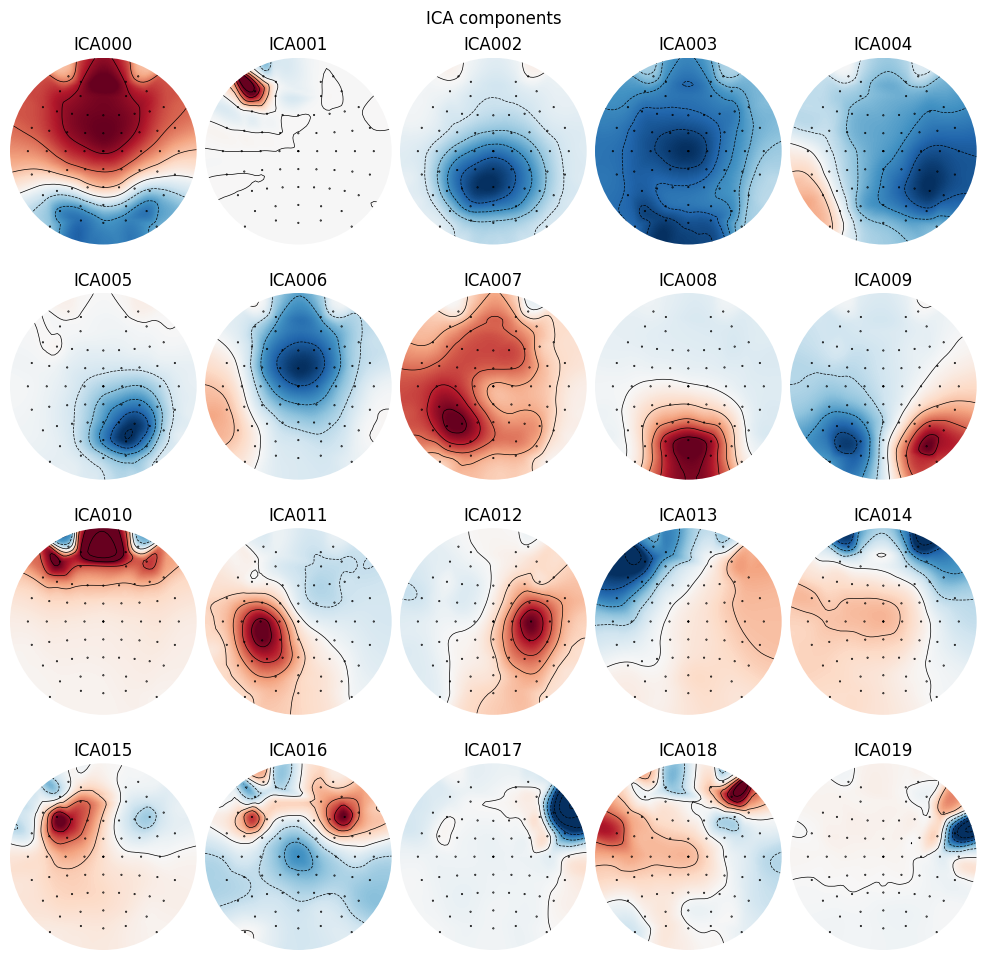

In [30]:
# ica.plot_components?
ica.plot_components()

In [31]:
ica.exclude?
ica.exclude = [1,10,14,17,18,19]


Type:        list
String form: []
Length:      0
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

In [35]:
ica.find_bads_eog?

Signature:
ica.find_bads_eog(
    inst,
    ch_name=None,
    threshold=3.0,
    start=None,
    stop=None,
    l_freq=1,
    h_freq=10,
    reject_by_annotation=True,
    measure='zscore',
    verbose=None,
)
Docstring:
Detect EOG related components using correlation.

Detection is based on Pearson correlation between the
filtered data and the filtered EOG channel.
Thresholding is based on adaptive z-scoring. The above threshold
components will be masked and the z-score will be recomputed
until no supra-threshold component remains.

Parameters
----------
inst : instance of Raw, Epochs or Evoked
    Object to compute sources from.
ch_name : str
    The name of the channel to use for EOG peak detection.
    The argument is mandatory if the dataset contains no EOG
    channels.
threshold : float | str
    Value above which a feature is classified as outlier.

    - If ``measure`` is ``'zscore'``, defines the threshold on the
      z-score used in the iterative z-scoring method.
    - If 

In [32]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


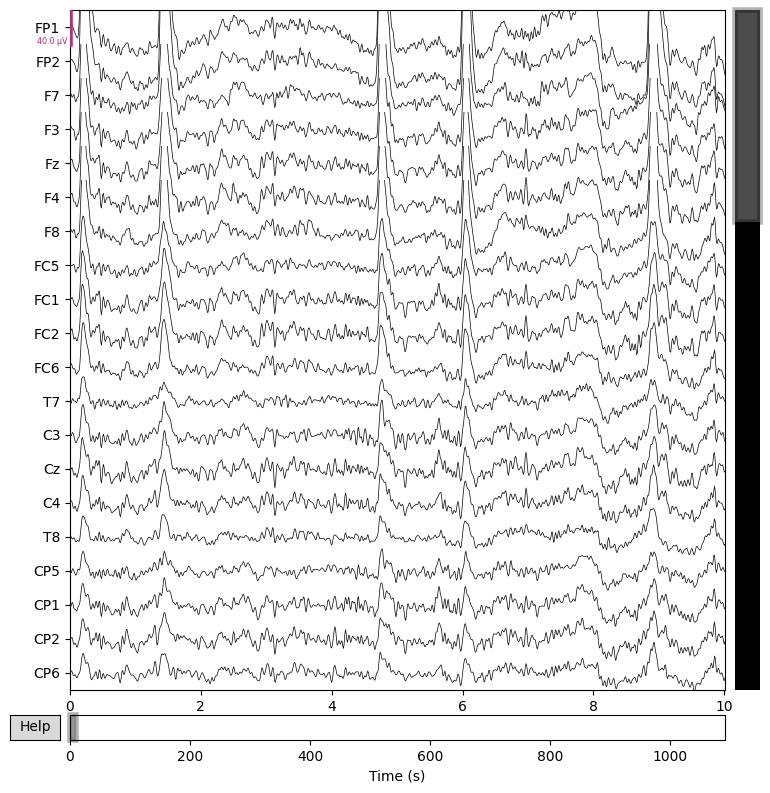

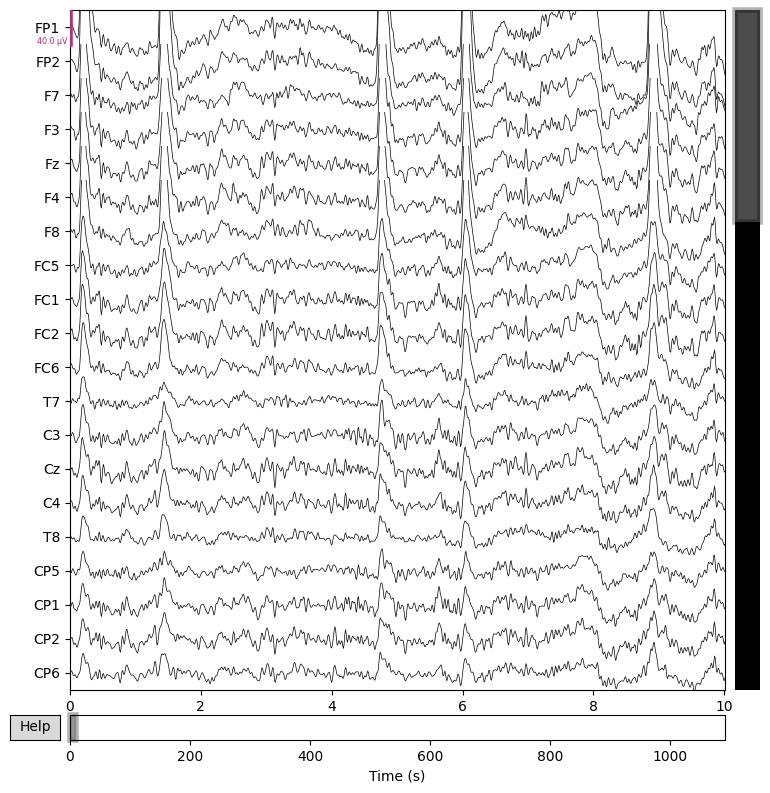

In [33]:
raw.plot()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


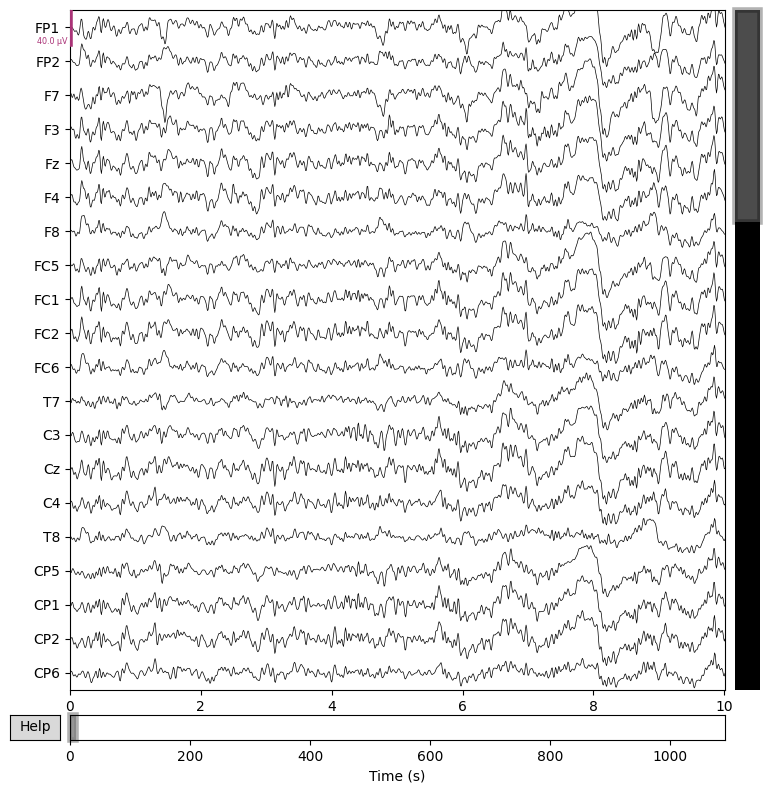

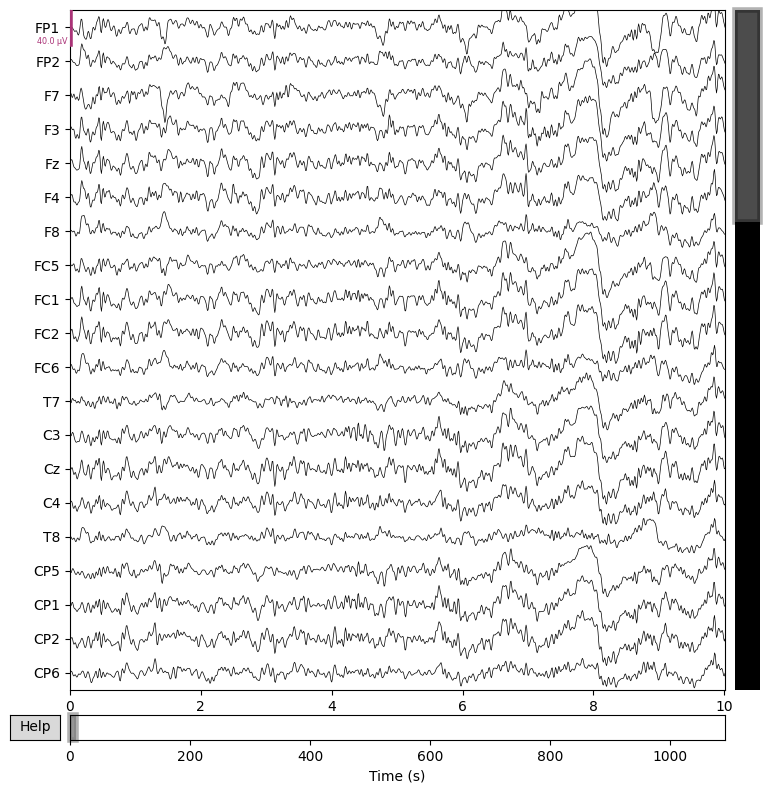

In [34]:
ica.apply(raw.copy(), exclude=ica.exclude).plot()

In [36]:
events = mne.find_events(raw)

903 events found on stim channel STI 014
Event IDs: [100 200]


In [38]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]], dtype=int64)

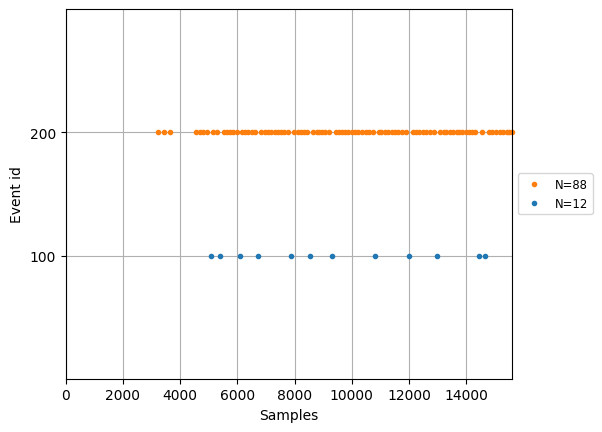

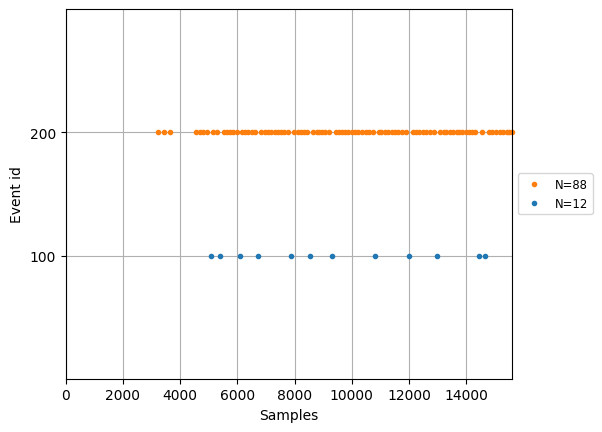

In [37]:
mne.viz.plot_events(events[:100])

In [42]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


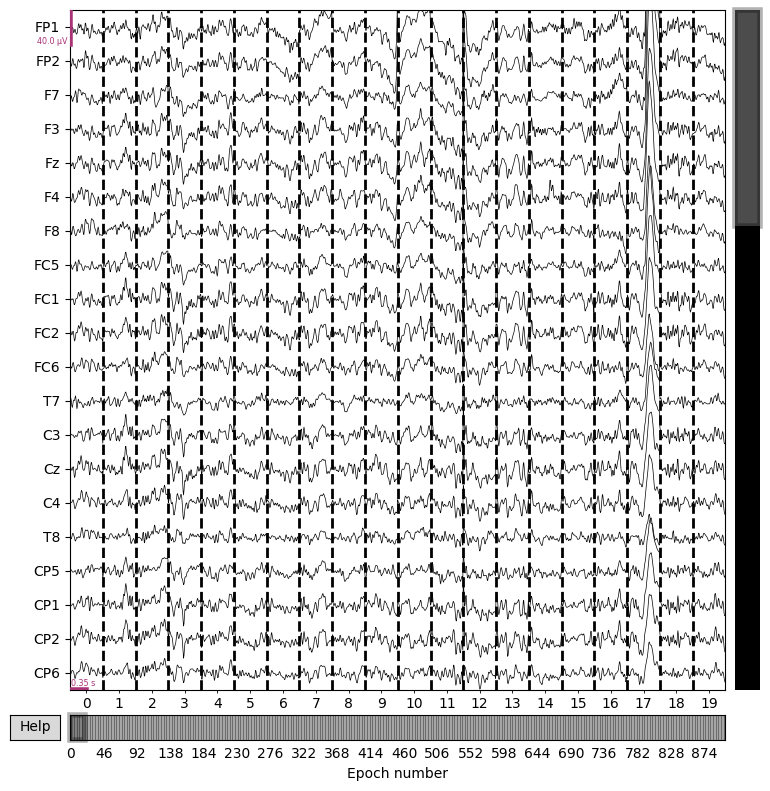

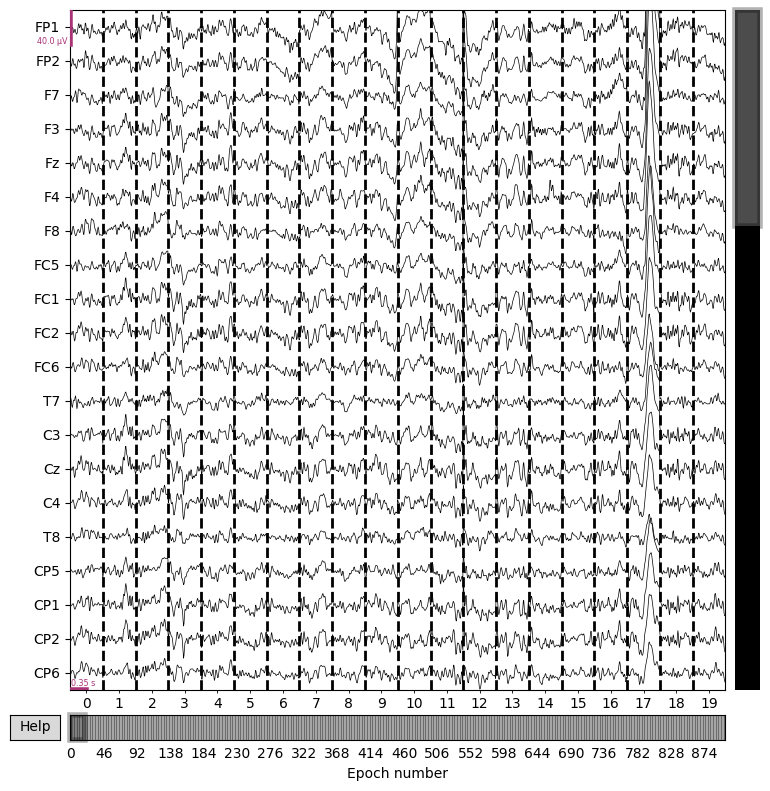

In [43]:
epochs.plot()

In [44]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance


    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


C:\Users\realv\AppData\Local\Temp\ipykernel_12476\3077353632.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [45]:

epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


<Epochs |  903 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

In [ ]:
epochs.

In [46]:
epochs["target"]

<Epochs |  106 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~3.7 MB, data loaded,
 'target/stimulus': 106>

In [47]:
epochs["stimulus"]

<Epochs |  903 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


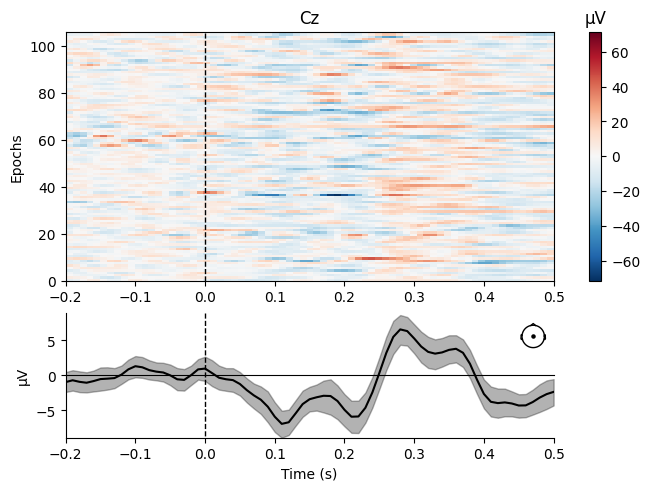

[<Figure size 640x480 with 4 Axes>]

In [48]:
epochs["target"].plot_image(picks=[13])

In [49]:
epochs.equalize_event_counts(event_ids)
epochs


Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs |  212 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~7.4 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [51]:
epochs.save("oddball-epo.fif")  # remember, the data has been cleaned of bad ICs

In [53]:
epochs_for_tfr = mne.Epochs(raw, events, event_id=event_ids,
                            tmin=-.5, tmax=1.5, preload=True)  # need longer data segment
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)
epochs_for_tfr.equalize_event_counts(event_ids);  # to speed up things
epochs_for_tfr.save("oddball-long-epo.fif")

Not setting metadata
903 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 201 original time points ...


0 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


C:\Users\realv\AppData\Local\Temp\ipykernel_12476\1047480197.py:3: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)


Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,